In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# For K-Means, we typically use numerical features.
# Let's select 'Annual Income (k$)' and 'Spending Score (1-100)' for clustering as they are often used in this dataset.
# We also need to handle categorical data if present. 'Gender' is categorical.
# For simplicity, let's focus on the numerical features that are most relevant for clustering in this context.

In [7]:
x = df[['Annual Income (k$)','Spending Score (1-100)']]

In [8]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [10]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled_df = pd.DataFrame(x_scaled,columns=x.columns)

In [12]:
print("\nOriginal data before scaling (first 5 rows):")
print(x.head())
print("\nScaled data (first 5 rows):")
print(x_scaled_df.head())


Original data before scaling (first 5 rows):
   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40

Scaled data (first 5 rows):
   Annual Income (k$)  Spending Score (1-100)
0           -1.738999               -0.434801
1           -1.738999                1.195704
2           -1.700830               -1.715913
3           -1.700830                1.040418
4           -1.662660               -0.395980


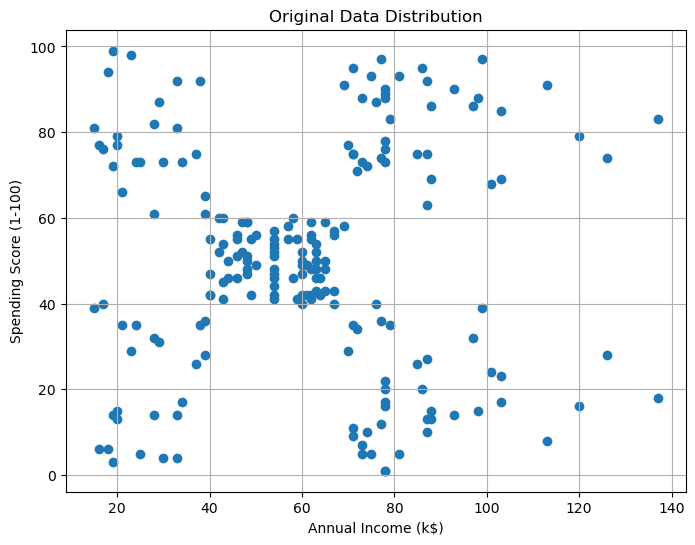

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Original Data Distribution')
plt.grid(True)
plt.show()

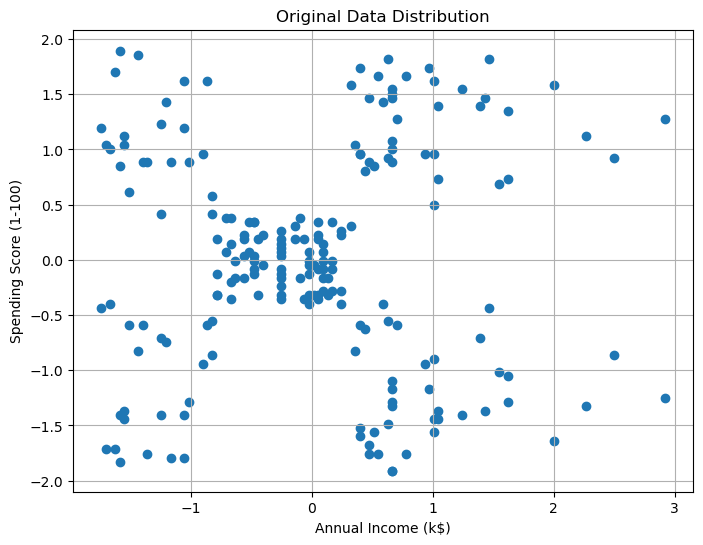

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(x_scaled_df['Annual Income (k$)'], x_scaled_df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Original Data Distribution')
plt.grid(True)
plt.show()

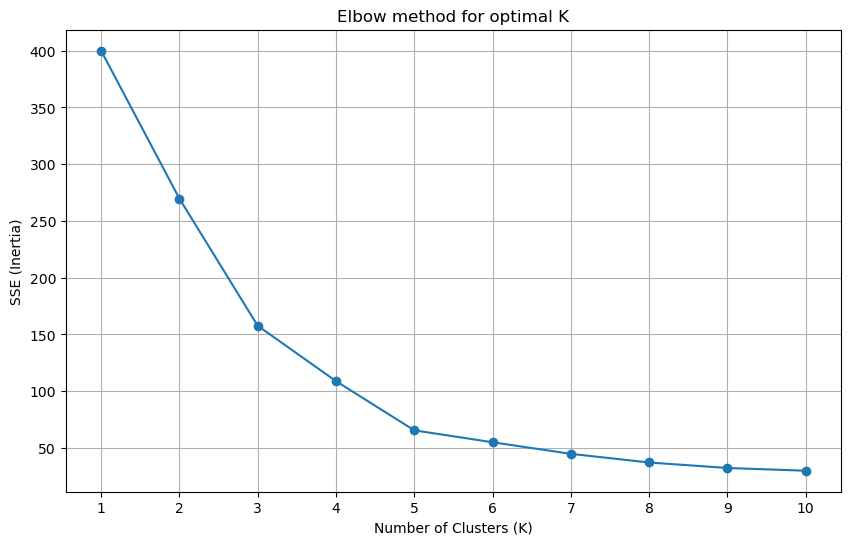

In [23]:
#Using the Elbow method to find optimal K
sse = []
k_values = range(1,11)
for k in k_values:
    kmeans = KMeans(n_clusters=k,random_state=42,n_init=10)
    kmeans.fit(x_scaled)
    sse.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(k_values,sse,marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow method for optimal K')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [24]:
# Based on the typical elbow plot for this dataset, K=5 is often a good choice
optimal_k = 5
#Fitting K-means with optimal K
kmeans = KMeans(n_clusters=optimal_k,random_state=42,n_init=10)
df['Cluster'] = kmeans.fit_predict(x_scaled)

In [25]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


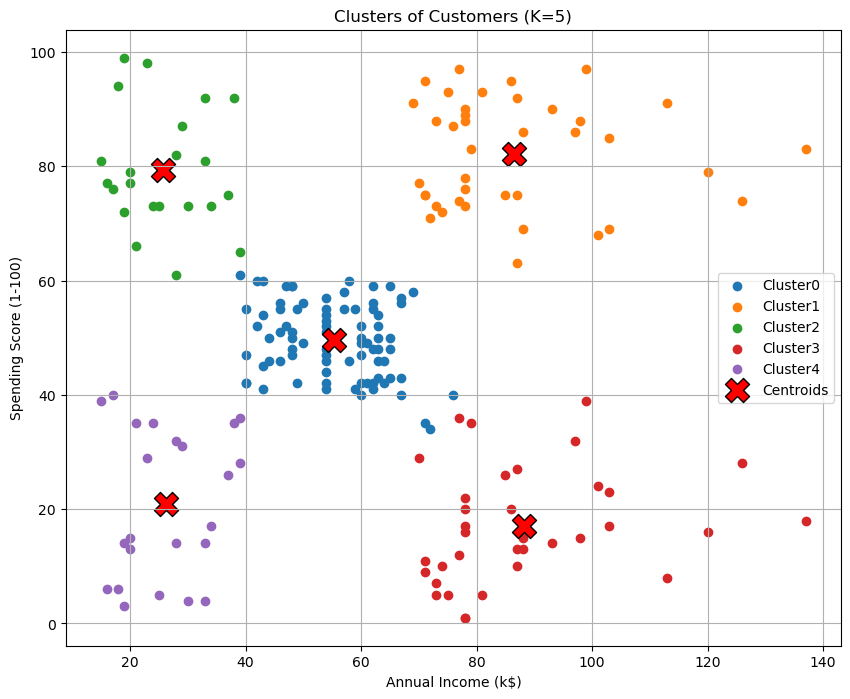

In [36]:
#visualizing clusters with color-coding
plt.figure(figsize=(10,8))
for cluster_num in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster']==cluster_num]
    plt.scatter(cluster_data['Annual Income (k$)'],cluster_data['Spending Score (1-100)'], label = f'Cluster{cluster_num}')
plt.scatter(kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0],kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1],s=300, c='red', marker='X', label='Centroids', edgecolors='black')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title(f'Clusters of Customers (K={optimal_k})')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
#evaluating clustering using silhouette score
if optimal_k > 1:
    silhouette_avg = silhouette_score(x_scaled, df['Cluster'])
    print(f"Silhouette Score for K={optimal_k}: {silhouette_avg:.3f}")
    print("A higher Silhouette Score indicates better-defined clusters.")
else:
    print("Silhouette Score cannot be calculated for K=1.")
    

Silhouette Score for K=5: 0.555
A higher Silhouette Score indicates better-defined clusters.
